In [1]:
import curriculaLDA
from tqdm import tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/osama.nasir@ebryx.com/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import nltk
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
#%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
#df_tmp = curriculaLDA.loadCurricula()

In [4]:
#df_tmp.to_excel("all_curricula.xlsx", engine='xlsxwriter')
#len(df_tmp)

# Preprocessing Data

In [5]:
df = pd.read_excel('all_curricula.xlsx')
#df = df_tmp

In [6]:
df.head()

,Unnamed: 0,filename,text
0,0,LGST-242-642.pdf,"\n\n \n\n \n\nLGST 242/642 \nBig Data, Big Re..."
1,1,CodeAndPower2017.pdf,LIS 500 \nCODE and POWER\n\nSchool of Library ...
2,2,Time-Machine-syllabus.pdf,UNIV 200-10 Time/Machine - Syllabus\n\nWelcome...
3,3,CMS_332D_Digital_Ethics_Syllabus_Undergr.pdf,CMS 332D Digital Ethics \nUniversity of Texas ...
4,4,i453-syllabus.pdf,School Of Informatics & Computing\n\nInformati...


In [7]:
len(df)

166

In [8]:
corpus, id2word, data_lemmatized = curriculaLDA.preprocessData(df)

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/osama.nasir@ebryx.com/anaconda3/envs/myenv/lib/python3.7/site-packages/en_core_web_sm
-->
/home/osama.nasir@ebryx.com/anaconda3/envs/myenv/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [9]:
print(len(corpus))
print(len(id2word))
print(len(data_lemmatized))
#print(data_lemmatized)

166
1515
166


# Bloom model

In [10]:
#defining bloom levels
bloom = list()
#create
bloom.append(['abstract', 'animate', 'arrange', 'assemble', 'budget', 'categorize', 'code', 'combine', 'compile', 'compose', 'construct', 'cope', 'correspond', 'create', 'cultivate', 'debug', 'depict', 'design', 'develop', 'devise', 'dictate', 'enhance', 'explain', 'facilitate', 'format', 'formulate', 'generalize', 'generate', 'handle', 'import', 'improve', 'incorporate', 'integrate', 'interface', 'join', 'lecture', 'model', 'modify', 'network', 'organize', 'outline', 'overhaul', 'plan', 'portray', 'prepare', 'prescribe', 'produce', 'program', 'rearrange', 'reconstruct', 'relate', 'reorganize', 'revise', 'rewrite', 'specify', 'summarize'])
#evaluate
bloom.append(['appraise', 'assess', 'compare', 'conclude', 'contrast', 'counsel', 'criticize', 'critique', 'defend', 'determine', 'discriminate', 'estimate', 'evaluate', 'explain', 'grade', 'hire', 'interpret', 'judge', 'justify', 'measure', 'predict', 'prescribe', 'rank', 'rate', 'recommend', 'release', 'select', 'summarize', 'support', 'test', 'validate', 'verify'])
#analyze
bloom.append(['analyze', 'audit', 'blueprint', 'breadboard', 'break down', 'characterize', 'classify', 'compare', 'confirm', 'contrast', 'correlate', 'detect', 'diagnose', 'diagram', 'differentiate', 'discriminate', 'dissect', 'distinguish', 'document', 'ensure', 'examine', 'explain', 'explore', 'figure out', 'file', 'group', 'identify', 'illustrate', 'infer', 'interrupt', 'inventory', 'investigate', 'layout', 'manage', 'maximize', 'minimize', 'optimize', 'order', 'outline', 'point out', 'prioritize', 'proofread', 'query', 'relate', 'select', 'separate', 'subdivide', 'train', 'transform'])
#apply
bloom.append(['acquire', 'adapt', 'allocate', 'alphabetize', 'apply', 'ascertain', 'assign', 'attain', 'avoid', 'back up', 'calculate', 'capture', 'change', 'classify', 'complete', 'compute', 'construct', 'customize', 'demonstrate', 'depreciate', 'derive', 'determine', 'diminish', 'discover', 'draw', 'employ', 'examine', 'exercise', 'explore', 'expose', 'express', 'factor', 'figure', 'graph', 'handle', 'illustrate', 'interconvert', 'investigate', 'manipulate', 'modify', 'operate', 'personalize', 'plot', 'practice', 'predict', 'prepare', 'price', 'process', 'produce', 'project', 'provide', 'relate', 'round off', 'sequence', 'show', 'simulate', 'sketch', 'solve', 'subscribe', 'tabulate', 'transcribe', 'translate', 'use'])
#understand
bloom.append(['add', 'approximate', 'articulate', 'associate', 'characterize', 'clarify', 'classify', 'compare', 'compute', 'contrast', 'convert', 'defend', 'describe', 'detail', 'differentiate', 'discuss', 'distinguish', 'elaborate', 'estimate', 'example', 'explain', 'express', 'extend', 'extrapolate', 'factor', 'generalize', 'give', 'infer', 'interact', 'interpolate', 'interpret', 'observe', 'paraphrase', 'picture graphically', 'predict', 'review', 'rewrite', 'subtract', 'summarize', 'translate', 'visualize'])
#remember
bloom.append(['cite', 'define', 'describe', 'draw', 'enumerate', 'identify', 'index', 'indicate', 'label', 'list', 'match', 'meet', 'name', 'outline', 'point', 'quote', 'read', 'recall', 'recite', 'recognize', 'record', 'repeat', 'reproduce', 'review', 'select', 'state', 'study', 'tabulate', 'trace', 'write'])

In [11]:
#bloom bag of words
bloom_bow = [id2word.doc2bow(text) for text in bloom]

In [12]:
# vectorized the bloom bag of words into a vector
bloom_level = np.zeros((len(bloom_bow), len(id2word)))
for i, bloom_bow_i in enumerate(bloom_bow):
    for id, count in bloom_bow_i:
        bloom_level[i][id] = count

In [13]:
#vectorized each document (bag of words) into a vector
corpus_vectorized = np.zeros((len(corpus), len(id2word)))
for i, corpus_i in enumerate(corpus):
    for id, count in corpus_i:
        corpus_vectorized[i][id] = count

In [14]:
#total bloom words matched in a document
bloom_word_match = np.dot(corpus_vectorized,bloom_level.transpose())

#total number of words in each document
total_words = corpus_vectorized.sum(axis=1)

bloom_contr = list()
filename_list = list()

# probability estimation
for i, corpus_i in enumerate(total_words):
    bloom_contr.append(bloom_word_match[i]/corpus_i)
    filename_list.append(df['filename'][i])
    
# round off to 4 decimal points
bloom_contr = np.around(bloom_contr, 4)

# create a dataframe for bloom probabilities of each document with filename
corpus_bloom_df = pd.DataFrame(data=bloom_contr)
corpus_bloom_df['FILE NAME'] = filename_list

#rename the columns
corpus_bloom_df.columns = ['Bloom_1', 'Bloom_2', 'Bloom_3', 'Bloom_4', 'Bloom_5', 'Bloom_6', 'FILE NAME']
corpus_bloom_df

/home/osama.nasir@ebryx.com/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


,Bloom_1,Bloom_2,Bloom_3,Bloom_4,Bloom_5,Bloom_6,FILE NAME
0,0.0242,0.0204,0.0184,0.0242,0.0223,0.0359,LGST-242-642.pdf
1,0.0325,0.0092,0.0150,0.0408,0.0258,0.0275,CodeAndPower2017.pdf
2,0.0256,0.0142,0.0142,0.0227,0.0085,0.0199,Time-Machine-syllabus.pdf
3,0.0271,0.0153,0.0119,0.0203,0.0119,0.0220,CMS_332D_Digital_Ethics_Syllabus_Undergr.pdf
4,0.0213,0.0091,0.0061,0.0366,0.0152,0.0274,i453-syllabus.pdf
...,...,...,...,...,...,...,...
161,0.0237,0.0119,0.0079,0.0237,0.0316,0.0158,"AI Safety, Ethics, and Policy.txt"
162,0.0158,0.0201,0.0259,0.0173,0.0173,0.0273,"Peter Suber, _Consent & Coercion_.txt"
163,0.0905,0.0046,0.0023,0.0139,0.0116,0.0093,ICCS_ Course Schedule for Intelligent Control ...
164,0.0275,0.0103,0.0186,0.0227,0.0165,0.0310,ECS 188 - Ethics in an Age of Technology - Phi...


In [15]:
# read the metadata+LDA of all corpus
df_metadata = pd.read_excel('LDA_results.xlsx')
df_metadata.head(5)

,FILE NAME,COURSE TITLE,CODE,UNIVERSITY,COUNTRY,CONTINENT,DISCIPLINE,DEPARTMENT,LEVEL,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10
0,CMSC 119_ Schedule.html,(De-)Coding the Drone,CMSC 119,Bard College,United States,North America,CS,Computer Science,Undergraduate,0.1017,0.1784,0.1142,0.1800,0.0548,0.1025,0.0383,0.1111,0.0563,0.0626
1,#BlockchainEthics_ The Impact and Ethics of Cr...,The Ethics and Impact of Cryptocurrency and Bl...,NaN,MIT,United States,North America,HUMN,MIT Media Lab,Graduate,0.1102,0.2390,0.0677,0.0246,0.0124,0.2553,0.0948,0.0355,0.0800,0.0803
2,"AI Safety, Ethics, and Policy.txt","AI Safety, Ethics, and Policy",COMS W 3995-001,Columbia University,United States,North America,CS,Computer Science,Undergraduate,0.1425,0.0773,0.0330,0.2917,0.0302,0.1150,0.0389,0.1127,0.1201,0.0385
3,Algorithms and Society.html,Algorithms and Society,EECS 395 and COMMST 395,Northwestern University,United States,North America,CS,Computer Science and Communication Studies,"Undergraduate, Graduate",0.2005,0.0687,0.0687,0.0830,0.0217,0.1102,0.0656,0.2308,0.0882,0.0626
4,Algorithms and Society - University of Michiga...,Algorithms and Society,NaN,University of Michigan,United States,North America,HUMN,School of Information,Undergraduate,0.1564,0.0391,0.1644,0.0519,0.0339,0.0887,0.0456,0.1225,0.0645,0.2331


In [16]:
#merge the bloom df with metadata+LDA
merged_inner = pd.merge(left=df_metadata, right=corpus_bloom_df, left_on='FILE NAME', right_on='FILE NAME')

In [17]:
merged_inner.head(5)

,FILE NAME,COURSE TITLE,CODE,UNIVERSITY,COUNTRY,CONTINENT,DISCIPLINE,DEPARTMENT,LEVEL,Topic_1,...,Topic_7,Topic_8,Topic_9,Topic_10,Bloom_1,Bloom_2,Bloom_3,Bloom_4,Bloom_5,Bloom_6
0,CMSC 119_ Schedule.html,(De-)Coding the Drone,CMSC 119,Bard College,United States,North America,CS,Computer Science,Undergraduate,0.1017,...,0.0383,0.1111,0.0563,0.0626,0.0638,0.0106,0.0000,0.0638,0.0106,0.0106
1,#BlockchainEthics_ The Impact and Ethics of Cr...,The Ethics and Impact of Cryptocurrency and Bl...,NaN,MIT,United States,North America,HUMN,MIT Media Lab,Graduate,0.1102,...,0.0948,0.0355,0.0800,0.0803,0.0391,0.0258,0.0308,0.0366,0.0283,0.0175
2,"AI Safety, Ethics, and Policy.txt","AI Safety, Ethics, and Policy",COMS W 3995-001,Columbia University,United States,North America,CS,Computer Science,Undergraduate,0.1425,...,0.0389,0.1127,0.1201,0.0385,0.0237,0.0119,0.0079,0.0237,0.0316,0.0158
3,Algorithms and Society.html,Algorithms and Society,EECS 395 and COMMST 395,Northwestern University,United States,North America,CS,Computer Science and Communication Studies,"Undergraduate, Graduate",0.2005,...,0.0656,0.2308,0.0882,0.0626,0.0212,0.0000,0.0061,0.0394,0.0242,0.0273
4,Algorithms and Society - University of Michiga...,Algorithms and Society,NaN,University of Michigan,United States,North America,HUMN,School of Information,Undergraduate,0.1564,...,0.0456,0.1225,0.0645,0.2331,0.0289,0.0259,0.0198,0.0228,0.0228,0.0289


In [18]:
# write reults (metadata+LDA+bloom) into xlsx file
merged_inner.to_excel("Bloom_results.xlsx", engine='xlsxwriter', index=False)

# Heatmaps

In [19]:
import seaborn as sns
%matplotlib inline
merged_inner = pd.read_excel('Bloom_results.xlsx')

# Bloom x country

In [20]:
df1 = merged_inner.groupby('COUNTRY').median()
df1.drop('Topic_1', axis = 1, inplace = True)
df1.drop('Topic_2', axis = 1, inplace = True)
df1.drop('Topic_3', axis = 1, inplace = True)
df1.drop('Topic_4', axis = 1, inplace = True)
df1.drop('Topic_5', axis = 1, inplace = True)
df1.drop('Topic_6', axis = 1, inplace = True)
df1.drop('Topic_7', axis = 1, inplace = True)
df1.drop('Topic_8', axis = 1, inplace = True)
df1.drop('Topic_9', axis = 1, inplace = True)
df1.drop('Topic_10', axis = 1, inplace = True)
df1.head()

,Bloom_1,Bloom_2,Bloom_3,Bloom_4,Bloom_5,Bloom_6
COUNTRY,,,,,,
Australia,0.0495,0.0164,0.0214,0.0281,0.0107,0.0117
Austria,0.0263,0.0096,0.0383,0.0558,0.0144,0.0104
Canada,0.0261,0.0113,0.0246,0.0284,0.0193,0.0209
Chile,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
China,0.0552,0.0000,0.0065,0.0162,0.0000,0.0032


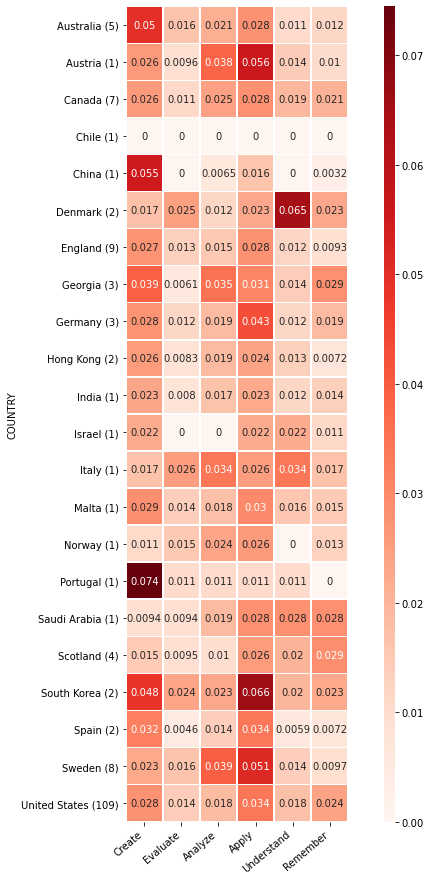

In [21]:
grid_kws = {"width_ratios": (.9, .04), "hspace": .1}
fig, (ax, cbar_ax) = plt.subplots(1,2, figsize=(5,15), gridspec_kw=grid_kws)

sns.heatmap(df1, ax=ax, cbar_ax=cbar_ax, square=True, annot=True, linewidths=.5, cmap="Reds", cbar_kws={})
xlabels = ['Create', 'Evaluate', 'Analyze', 'Apply', 'Understand', 'Remember']
ylabels = ['Australia (5)' ,'Austria (1)' ,'Canada (7)' ,'Chile (1)' ,'China (1)' ,'Denmark (2)' ,'England (9)' ,'Georgia (3)' ,'Germany (3)' ,'Hong Kong (2)' ,'India (1)' ,'Israel (1)' ,'Italy (1)' ,'Malta (1)' ,'Norway (1)' ,'Portugal (1)' ,'Saudi Arabia (1)' ,'Scotland (4)' ,'South Korea (2)' ,'Spain (2)' ,'Sweden (8)' ,'United States (109)']

ax.set_xticklabels(xlabels, rotation=40, ha='right')
ax.set_yticklabels(ylabels, rotation=0, ha='right')
plt.savefig("corpus_bloom_x_country.pdf", bbox_inches='tight')

# Bloom x continent

In [22]:
df2 = merged_inner.groupby('CONTINENT').median()
df2.drop('Topic_1', axis = 1, inplace = True)
df2.drop('Topic_2', axis = 1, inplace = True)
df2.drop('Topic_3', axis = 1, inplace = True)
df2.drop('Topic_4', axis = 1, inplace = True)
df2.drop('Topic_5', axis = 1, inplace = True)
df2.drop('Topic_6', axis = 1, inplace = True)
df2.drop('Topic_7', axis = 1, inplace = True)
df2.drop('Topic_8', axis = 1, inplace = True)
df2.drop('Topic_9', axis = 1, inplace = True)
df2.drop('Topic_10', axis = 1, inplace = True)
df2.head()

,Bloom_1,Bloom_2,Bloom_3,Bloom_4,Bloom_5,Bloom_6
CONTINENT,,,,,,
Asia,0.02575,0.0087,0.0178,0.02525,0.0159,0.01235
Asia & Europe,0.03900,0.0061,0.0353,0.03090,0.0142,0.02850
Europe,0.02540,0.0137,0.0198,0.03390,0.0122,0.01090
North America,0.02810,0.0141,0.0186,0.03340,0.0177,0.02390
Ocenia,0.04950,0.0164,0.0214,0.02810,0.0107,0.01170


In [23]:
df2 = df2.transpose()
df2['Asia'] += df2['Asia & Europe']
df2['Europe'] += df2['Asia & Europe']
df2.drop('Asia & Europe', axis = 1, inplace = True)
df2.drop('Ocenia', axis = 1, inplace = True)
df2.drop('South America', axis = 1, inplace = True)
df2 = df2.transpose()
df2.head(10)

,Bloom_1,Bloom_2,Bloom_3,Bloom_4,Bloom_5,Bloom_6
CONTINENT,,,,,,
Asia,0.06475,0.0148,0.0531,0.05615,0.0301,0.04085
Europe,0.06440,0.0198,0.0551,0.06480,0.0264,0.03940
North America,0.02810,0.0141,0.0186,0.03340,0.0177,0.02390


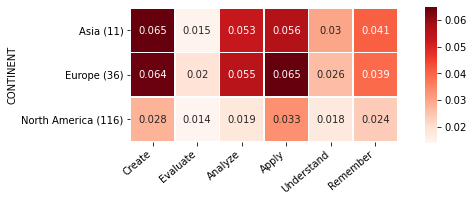

In [32]:
grid_kws = {"width_ratios": (.9, .04), "hspace": .1}
fig, (ax, cbar_ax) = plt.subplots(1,2, figsize=(5.5,2.5), gridspec_kw=grid_kws)

sns.heatmap(df2, ax=ax, cbar_ax=cbar_ax, square=True, annot=True, linewidths=.5, cmap="Reds", cbar_kws={})
ylabels = ['Asia (11)', 'Europe (36)', 'North America (116)']

ax.set_xticklabels(xlabels, rotation=40, ha='right')
ax.set_yticklabels(ylabels, rotation=0, ha='right')
plt.savefig("corpus_bloom_x_continent.pdf", bbox_inches='tight')

# Bloom x Discipline

In [25]:
merged_inner.loc[merged_inner['DISCIPLINE'] == 'CS & LAW', ['DISCIPLINE']] = 'Multidisciplinary'
merged_inner.loc[merged_inner['DISCIPLINE'] == 'CS & HUMN', ['DISCIPLINE']] = 'Multidisciplinary'
merged_inner.loc[merged_inner['DISCIPLINE'] == 'LAW', ['DISCIPLINE']] = 'Law'
merged_inner.loc[merged_inner['DISCIPLINE'] == 'CS', ['DISCIPLINE']] = 'Computer Science'
merged_inner.loc[merged_inner['DISCIPLINE'] == 'HUMN', ['DISCIPLINE']] = 'Humanities'

In [26]:
df3 = merged_inner.groupby('DISCIPLINE').median()
df3.drop('Topic_1', axis = 1, inplace = True)
df3.drop('Topic_2', axis = 1, inplace = True)
df3.drop('Topic_3', axis = 1, inplace = True)
df3.drop('Topic_4', axis = 1, inplace = True)
df3.drop('Topic_5', axis = 1, inplace = True)
df3.drop('Topic_6', axis = 1, inplace = True)
df3.drop('Topic_7', axis = 1, inplace = True)
df3.drop('Topic_8', axis = 1, inplace = True)
df3.drop('Topic_9', axis = 1, inplace = True)
df3.drop('Topic_10', axis = 1, inplace = True)
df3.head(10)

,Bloom_1,Bloom_2,Bloom_3,Bloom_4,Bloom_5,Bloom_6
DISCIPLINE,,,,,,
Computer Science,0.03360,0.01375,0.01880,0.03555,0.0156,0.01825
Humanities,0.02655,0.01420,0.01930,0.02935,0.0158,0.02295
Law,0.02420,0.00920,0.01840,0.02290,0.0237,0.01780
Multidisciplinary,0.02165,0.01545,0.01815,0.03240,0.0167,0.02135


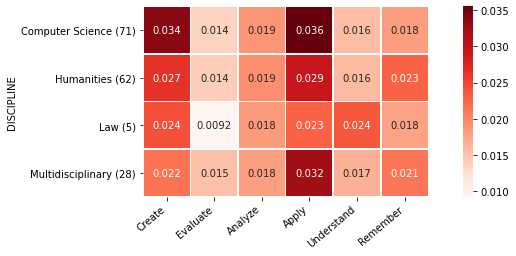

In [27]:
grid_kws = {"width_ratios": (.9, .03), "hspace": .1}
fig, (ax, cbar_ax) = plt.subplots(1,2, figsize=(6,3.5), gridspec_kw=grid_kws)

sns.heatmap(df3, ax=ax, cbar_ax=cbar_ax, square=True, annot=True, linewidths=.5, cmap="Reds", cbar_kws={})
ylabels = ['Computer Science (71)', 'Humanities (62)', 'Law (5)', 'Multidisciplinary (28)']

ax.set_xticklabels(xlabels, rotation=40, ha='right')
ax.set_yticklabels(ylabels, rotation=0, ha='right')
plt.savefig("corpus_bloom_x_discipline.pdf", bbox_inches='tight')